<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#class_weight='balanced'" data-toc-modified-id="class_weight='balanced'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>class_weight='balanced'</a></span></li><li><span><a href="#upsampling" data-toc-modified-id="upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>upsampling</a></span></li><li><span><a href="#downsampling" data-toc-modified-id="downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>downsampling</a></span></li><li><span><a href="#Подбор-порогового-значения" data-toc-modified-id="Подбор-порогового-значения-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Подбор порогового значения</a></span></li><li><span><a href="#Показатели-на-валидационной-выборке" data-toc-modified-id="Показатели-на-валидационной-выборке-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Показатели на валидационной выборке</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

<a id="section_0"></a>
# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверим *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измерим *AUC-ROC* и сравним её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Импортируем необходимые для проведения исследования библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve

In [5]:
# оптимизируем отображение чисел с точкой
pd.set_option('display.float_format', '{:,.2f}'.format)

# убираем предупреждение pandas vs sklearn
pd.options.mode.chained_assignment = None 

# убираем предупреждения
import warnings
warnings.filterwarnings('ignore')

<a id="section_1"></a>
## Подготовка данных

Загрузим данные из предоставленного файла.

In [6]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')
    
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


Данные читаемы, выведем информацию о них.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В графе Tenure пропуски. Посмотрим на характеристики данных с пропусками.

In [8]:
data.query('Tenure.isna()', engine='python').describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,909.00,NaN,NaN,NaN,"4,866.39","2,909.60",31.00,"2,311.00","4,887.00","7,306.00","10,000.00"
CustomerId,909.00,NaN,NaN,NaN,"15,689,814.58","75,112.25","15,565,806.00","15,626,578.00","15,686,870.00","15,756,804.00","15,815,690.00"
Surname,909,665,Hughes,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,909.00,NaN,NaN,NaN,648.45,99.08,359.00,580.00,647.00,718.00,850.00
Geography,909,3,France,464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,909,2,Male,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,909.00,NaN,NaN,NaN,38.65,9.79,18.00,32.00,37.00,43.00,92.00
Tenure,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance,909.00,NaN,NaN,NaN,"76,117.34","63,105.69",0.00,0.00,"96,674.55","128,554.98","206,663.75"
NumOfProducts,909.00,NaN,NaN,NaN,1.53,0.59,1.00,1.00,1.00,2.00,4.00


Сравним с характеристиками данных по всей таблице.

In [9]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,"10,000.00",NaN,NaN,NaN,"5,000.50","2,886.90",1.00,"2,500.75","5,000.50","7,500.25","10,000.00"
CustomerId,"10,000.00",NaN,NaN,NaN,"15,690,940.57","71,936.19","15,565,701.00","15,628,528.25","15,690,738.00","15,753,233.75","15,815,690.00"
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,"10,000.00",NaN,NaN,NaN,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,"10,000.00",NaN,NaN,NaN,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"9,091.00",NaN,NaN,NaN,5.00,2.89,0.00,2.00,5.00,7.00,10.00
Balance,"10,000.00",NaN,NaN,NaN,"76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",NaN,NaN,NaN,1.53,0.58,1.00,1.00,1.00,2.00,4.00


Отличительных особенностей в данных с пропусками не выявлено.

Можем заместить пропуски Tenure медианой по возрасту.

In [10]:
data["Tenure"] = data.groupby("Age")["Tenure"].transform(lambda x: x.fillna(x.median()))

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,"10,000.00","5,000.50","2,886.90",1.00,"2,500.75","5,000.50","7,500.25","10,000.00"
CustomerId,"10,000.00","15,690,940.57","71,936.19","15,565,701.00","15,628,528.25","15,690,738.00","15,753,233.75","15,815,690.00"
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"10,000.00",5.00,2.76,0.00,3.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"


<a id="info_1"></a>
Преобразования успешны, пропусков больше нет. Обратим внимание, что среднее в графе Exited = 0.20, т.е. данные не сбалансированы.

In [12]:
data.duplicated().sum()

0

Дубликатов тоже нет.

Приведем наименования колонок к стилю стилю snake_case.

In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
new_columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active-member', 'estimated_salary', 'exited']

In [15]:
data.columns = new_columns

Избавимся от избыточных столбцов.

In [16]:
data = data.drop(['row_number', 'customer_id', 'surname'], axis=1)

Приведем столбцы типа object к числовым методом one-hot encoding.

In [17]:
data_ohe = pd.get_dummies(data, drop_first=True)

Отделим целевой признак и разобьем данные на обучающую, валидационную и тестовую выборки.

In [20]:
features = data_ohe.drop(['exited'], axis=1)
target = data_ohe['exited']
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=.5, random_state=12345)
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)
(6000,)
(2000,)
(2000,)


Приступим к масштабированию данных.

Определим столбцы с количественными призниками.

In [21]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

Применим функцию StandardScaler()

In [22]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Проверим результат.

In [23]:
features_train.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,"6,000.00",-0.00,1.00,-3.14,-0.69,0.02,0.67,2.05
age,"6,000.00",0.00,1.00,-1.99,-0.66,-0.18,0.48,5.04
tenure,"6,000.00",0.00,1.00,-1.83,-0.74,-0.01,0.72,1.81
balance,"6,000.00",-0.00,1.00,-1.23,-1.23,0.33,0.82,2.81
num_of_products,"6,000.00",-0.00,1.00,-0.89,-0.89,-0.89,0.83,4.27
has_cr_card,"6,000.00",0.71,0.45,0.00,0.00,1.00,1.00,1.00
is_active-member,"6,000.00",0.53,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,"6,000.00",-0.00,1.00,-1.72,-0.86,0.01,0.85,1.74
geography_Germany,"6,000.00",0.25,0.43,0.00,0.00,0.00,0.00,1.00
geography_Spain,"6,000.00",0.25,0.43,0.00,0.00,0.00,1.00,1.00


In [24]:
features_valid.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,"2,000.00",-0.05,1.00,-2.98,-0.76,-0.04,0.66,2.05
age,"2,000.00",-0.00,1.02,-1.99,-0.66,-0.18,0.48,5.04
tenure,"2,000.00",-0.07,1.01,-1.83,-0.83,-0.01,0.72,1.81
balance,"2,000.00",0.01,1.01,-1.23,-1.23,0.36,0.83,2.60
num_of_products,"2,000.00",0.05,1.01,-0.89,-0.89,0.83,0.83,4.27
has_cr_card,"2,000.00",0.70,0.46,0.00,0.00,1.00,1.00,1.00
is_active-member,"2,000.00",0.50,0.50,0.00,0.00,0.00,1.00,1.00
estimated_salary,"2,000.00",0.03,1.00,-1.72,-0.84,0.01,0.92,1.74
geography_Germany,"2,000.00",0.26,0.44,0.00,0.00,0.00,1.00,1.00
geography_Spain,"2,000.00",0.23,0.42,0.00,0.00,0.00,0.00,1.00


In [25]:
features_test.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,"2,000.00",-0.04,1.02,-3.14,-0.76,-0.05,0.69,2.05
age,"2,000.00",-0.00,0.96,-1.99,-0.66,-0.18,0.48,3.99
tenure,"2,000.00",0.01,1.01,-1.83,-0.74,-0.01,0.72,1.81
balance,"2,000.00",-0.02,1.01,-1.23,-1.23,0.32,0.81,2.33
num_of_products,"2,000.00",0.05,1.00,-0.89,-0.89,0.83,0.83,4.27
has_cr_card,"2,000.00",0.70,0.46,0.00,0.00,1.00,1.00,1.00
is_active-member,"2,000.00",0.50,0.50,0.00,0.00,0.00,1.00,1.00
estimated_salary,"2,000.00",0.02,0.98,-1.72,-0.77,0.02,0.86,1.74
geography_Germany,"2,000.00",0.25,0.43,0.00,0.00,0.00,1.00,1.00
geography_Spain,"2,000.00",0.25,0.43,0.00,0.00,0.00,1.00,1.00


Ок.

### Вывод

Выполены загрузка данных из файла, заполнение пропусков, удаление избыточных и переименование оставшихся столбцов, преобразование текстовых столбцов в числовые методом OHE, масштабирование количественных данных, выделение целевого признака и разбивка на обучающую, валидационную и тестовую выборки, размер выборок 6000, 2000 и 2000 объектов соответственно.

Данные подготовлены, можно приступать к их исследованию.

[В начало раздела 1](#section_1)

<a id="section_2"></a>
## Исследование задачи

Построим модели с использованием алгоритмов LogisticRegression, DecisionTreeClassifier, RandomForestClassifier и DummyClassifier с гиперпараметрами по умолчанию.

In [26]:
model_lr = LogisticRegression(random_state=12345) # solver='liblinear'
model_dt = DecisionTreeClassifier(random_state=12345)
model_rf = RandomForestClassifier(random_state=12345)
dummy_clf = DummyClassifier(random_state=12345)

In [27]:
model_list = [model_lr, model_dt, model_rf, dummy_clf]

In [28]:
for model in model_list:
    
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print(model)
    print(f'confusion_matrix\n{confusion_matrix(target_valid, predicted_valid)}')
    print(f'accuracy_score: {accuracy_score(target_valid, predicted_valid)}')
    print(f'recall_score: {recall_score(target_valid, predicted_valid)}')
    print(f'precision_score: {precision_score(target_valid, predicted_valid)}')
    print(f'f1_score: {f1_score(target_valid, predicted_valid)}')
    print()

LogisticRegression(random_state=12345)
confusion_matrix
[[1506   76]
 [ 319   99]]
accuracy_score: 0.8025
recall_score: 0.23684210526315788
precision_score: 0.5657142857142857
f1_score: 0.33389544688026984

DecisionTreeClassifier(random_state=12345)
confusion_matrix
[[1386  196]
 [ 212  206]]
accuracy_score: 0.796
recall_score: 0.49282296650717705
precision_score: 0.5124378109452736
f1_score: 0.5024390243902439

RandomForestClassifier(random_state=12345)
confusion_matrix
[[1526   56]
 [ 227  191]]
accuracy_score: 0.8585
recall_score: 0.4569377990430622
precision_score: 0.7732793522267206
f1_score: 0.574436090225564

DummyClassifier(random_state=12345)
confusion_matrix
[[1582    0]
 [ 418    0]]
accuracy_score: 0.791
recall_score: 0.0
precision_score: 0.0
f1_score: 0.0



### Вывод

Мы протестировали модели с использованием алгоритмов LogisticRegression, DecisionTreeClassifier, RandomForestClassifier и DummyClassifier с гиперпараметрами по умолчанию.

Лучшие показатели у модели, построеной по алгоритму RandomForestClassifier.
- accuracy_score: 0.8575
- recall_score: 0.45454545454545453
- precision_score: 0.7692307692307693
- f1_score: 0.5714285714285714

Метрика F1 немного не дотягивает до целевого уровня 0.59.

Проверка на вменяемость также пройдена:
accuracy_score: 0.8575 против 0.791 у случайной модели.

Выберем этот алгоритм для дальнейших экспериментов.

[В начало раздела 2](#section_2)

<a id="section_3"></a>
## Борьба с дисбалансом

На [этапе подготовки данных](#info_1) мы могли видеть неравномерность распределения целевого признака. Попробуем нивелировать влияние этого дисбаланса на модель различными методами.

### class_weight='balanced'

Установим гиперпараметру class_weight значение 'balanced' и сравним результаты с гиперпараметрами по умолчанию.

In [29]:
%%time

model = RandomForestClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("class_weight='balanced'")
print(f'confusion_matrix\n{confusion_matrix(target_valid, predicted_valid)}')
print(f'accuracy_score: {accuracy_score(target_valid, predicted_valid)}')
print(f'recall_score: {recall_score(target_valid, predicted_valid)}')
print(f'precision_score: {precision_score(target_valid, predicted_valid)}')
print(f'f1_score: {f1_score(target_valid, predicted_valid)}')

class_weight='balanced'
confusion_matrix
[[1531   51]
 [ 234  184]]
accuracy_score: 0.8575
recall_score: 0.44019138755980863
precision_score: 0.7829787234042553
f1_score: 0.5635528330781011
Wall time: 675 ms


стало хуже...

### upsampling

Увеличим количество объектов положительного класса методом upsampling и сравним результаты с дефолтной моделью.

In [30]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [31]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [32]:
target_upsampled.mean()

0.49895702962035876

In [33]:
%%time

model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('upsampled')
print(f'confusion_matrix\n{confusion_matrix(target_valid, predicted_valid)}')
print(f'accuracy_score: {accuracy_score(target_valid, predicted_valid)}')
print(f'recall_score: {recall_score(target_valid, predicted_valid)}')
print(f'precision_score: {precision_score(target_valid, predicted_valid)}')
print(f'f1_score: {f1_score(target_valid, predicted_valid)}')

upsampled
confusion_matrix
[[1472  110]
 [ 192  226]]
accuracy_score: 0.849
recall_score: 0.5406698564593302
precision_score: 0.6726190476190477
f1_score: 0.5994694960212201
Wall time: 951 ms


цель достигнута) 

f1_score: 0.6021220159151195

### downsampling

Уменьшим количество объектов отрицательного класса методом downsampling и сравним результаты с дефолтной моделью.

In [34]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [35]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [36]:
%%time

model = RandomForestClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('downsampled')
print(f'confusion_matrix\n{confusion_matrix(target_valid, predicted_valid)}')
print(f'accuracy_score: {accuracy_score(target_valid, predicted_valid)}')
print(f'recall_score: {recall_score(target_valid, predicted_valid)}')
print(f'precision_score: {precision_score(target_valid, predicted_valid)}')
print(f'f1_score: {f1_score(target_valid, predicted_valid)}')

downsampled
confusion_matrix
[[1241  341]
 [ 106  312]]
accuracy_score: 0.7765
recall_score: 0.7464114832535885
precision_score: 0.4777947932618683
f1_score: 0.5826330532212884
Wall time: 352 ms


опять плохо...

### Подбор порогового значения

Попробуем различные варианты порогового значения и сравним результаты с дефолтной моделью.

In [37]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

for threshold in np.arange(0, .51, 0.01):
    #predicted_valid = [1 for pred in probabilities_one_valid if pred >= threshold else 0]
    predicted_valid = probabilities_one_valid > threshold 
    f1 = f1_score(target_valid, predicted_valid)
    print(f"threshold = {threshold:.2f} , f1_score = {f1:.5f}")
    
print()
print(f"roc_auc_score = {auc_roc:.5f}")

threshold = 0.00 , f1_score = 0.36427
threshold = 0.01 , f1_score = 0.37758
threshold = 0.02 , f1_score = 0.38921
threshold = 0.03 , f1_score = 0.40181
threshold = 0.04 , f1_score = 0.41579
threshold = 0.05 , f1_score = 0.42771
threshold = 0.06 , f1_score = 0.44355
threshold = 0.07 , f1_score = 0.45742
threshold = 0.08 , f1_score = 0.47044
threshold = 0.09 , f1_score = 0.47619
threshold = 0.10 , f1_score = 0.48340
threshold = 0.11 , f1_score = 0.49555
threshold = 0.12 , f1_score = 0.50710
threshold = 0.13 , f1_score = 0.51977
threshold = 0.14 , f1_score = 0.52457
threshold = 0.15 , f1_score = 0.53406
threshold = 0.16 , f1_score = 0.54163
threshold = 0.17 , f1_score = 0.55333
threshold = 0.18 , f1_score = 0.56481
threshold = 0.19 , f1_score = 0.57018
threshold = 0.20 , f1_score = 0.57399
threshold = 0.21 , f1_score = 0.58478
threshold = 0.22 , f1_score = 0.58857
threshold = 0.23 , f1_score = 0.59788
threshold = 0.24 , f1_score = 0.59722
threshold = 0.25 , f1_score = 0.60163
threshold = 

threshold = 0.36 , f1_score = 0.61787, roc_auc_score = 0.84095 пока лучший результат

попробуем совместить upsampling и threshold

In [38]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

for threshold in np.arange(0, .51, 0.01):
    #predicted_valid = [1 for pred in probabilities_one_valid if pred >= threshold else 0]
    predicted_valid = probabilities_one_valid > threshold 
    f1 = f1_score(target_valid, predicted_valid)
    
    print(f"threshold = {threshold:.2f}, f1_score = {f1:.5f}")  
    
print()
print(f"roc_auc_score = {auc_roc:.5f}")

threshold = 0.00, f1_score = 0.35816
threshold = 0.01, f1_score = 0.36793
threshold = 0.02, f1_score = 0.38162
threshold = 0.03, f1_score = 0.39001
threshold = 0.04, f1_score = 0.39721
threshold = 0.05, f1_score = 0.40766
threshold = 0.06, f1_score = 0.41747
threshold = 0.07, f1_score = 0.42607
threshold = 0.08, f1_score = 0.43952
threshold = 0.09, f1_score = 0.44652
threshold = 0.10, f1_score = 0.45580
threshold = 0.11, f1_score = 0.46819
threshold = 0.12, f1_score = 0.47884
threshold = 0.13, f1_score = 0.48825
threshold = 0.14, f1_score = 0.49498
threshold = 0.15, f1_score = 0.49692
threshold = 0.16, f1_score = 0.50669
threshold = 0.17, f1_score = 0.51408
threshold = 0.18, f1_score = 0.52122
threshold = 0.19, f1_score = 0.52704
threshold = 0.20, f1_score = 0.53594
threshold = 0.21, f1_score = 0.53580
threshold = 0.22, f1_score = 0.54351
threshold = 0.23, f1_score = 0.54958
threshold = 0.24, f1_score = 0.55250
threshold = 0.25, f1_score = 0.55458
threshold = 0.26, f1_score = 0.56447
t

threshold = 0.40 , f1_score = 0.61432, roc_auc_score = 0.83717.

### Показатели на валидационной выборке

Засечем время обучения модели с лучшими характеристиками.

In [39]:
%%time

best_model = RandomForestClassifier(random_state=12345)
best_model.fit(features_upsampled, target_upsampled)

probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

predicted_valid = probabilities_one_valid > 0.40 
f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"threshold = 0.40 , f1_score = {f1:.5f}, roc_auc_score = {auc_roc:.5f}")    

threshold = 0.40 , f1_score = 0.61432, roc_auc_score = 0.83717
Wall time: 955 ms


Время обучения приемлемое - 948 ms,
метрика f1 тоже - 0.61432, 
значение roc_auc - 0.83717 - хоть и заметно меньше 1, в то же время существенно выше 0.5.

Построим ROC-кривую.

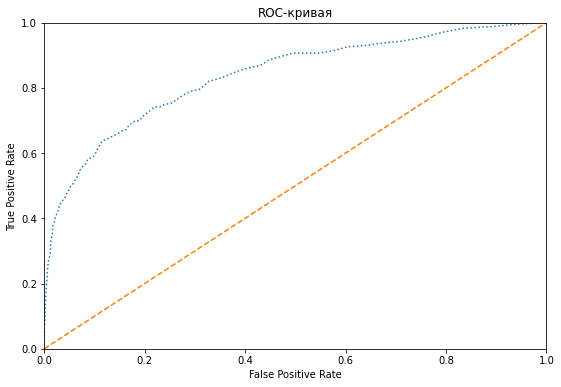

In [40]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure(figsize=(9, 6))
plt.plot(fpr, tpr, linestyle=':')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

Построим РR-кривую.

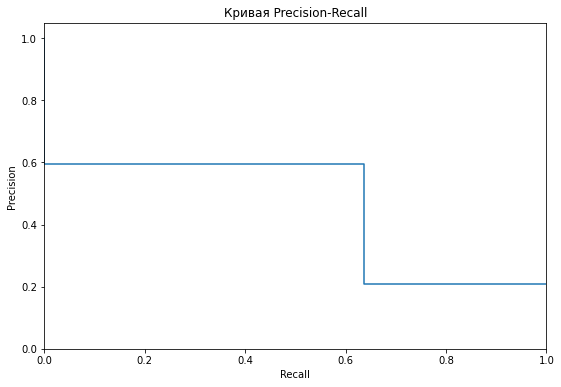

In [41]:
precision, recall, thresholds = precision_recall_curve(target_valid, predicted_valid)

plt.figure(figsize=(9, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show()

### Вывод

Мы проверили, какое влияние на результаты модели оказывают различные способы борьбы с дисбалансом:
- установка гиперпараметров с учетом весов классов,
- метод upsampling,
- метод downsampling,
- подбор порогового значения.

Наилучшие результаты показало сочетание upsampling'а с подбором порогового значения.

Показатели лучшей модели на валидационной выборке:

- время обучения приемлемое - 948 ms, 
- метрика f1 тоже - 0.61432, 
- значение roc_auc - 0.83717 - хоть и заметно меньше 1, в то же время существенно выше 0.5.

Можно приступать к проверке модели на тестовой выборке.

[В начало раздела 3](#section_3)

<a id="section_4"></a>
## Тестирование модели

Проверим best_model на тестовой выборке.

In [42]:
%%time

predicted_test = best_model.predict(features_test)

probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

f1 = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(f"f1_score = {f1:.5f}, roc_auc_score = {auc_roc:.5f}")   

f1_score = 0.59530, roc_auc_score = 0.84740
Wall time: 95.4 ms


Результаты хуже, чем на валидационной выборке. Попробуем улучшить качество модели подбором оптимальных гиперпараметров.

Определим лучшее значение max_depth.

In [43]:
%%time

for depth in range(1, 30):
    model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)

    f1 = f1_score(target_valid, predicted_valid)
    # auc_roc = roc_auc_score(target_valid, predicted_valid)

    print(f"max_depth = {depth}, f1_score = {f1:.5f}")   # , roc_auc_score = {auc_roc:.5f}

max_depth = 1, f1_score = 0.53360
max_depth = 2, f1_score = 0.55109
max_depth = 3, f1_score = 0.57303
max_depth = 4, f1_score = 0.60100
max_depth = 5, f1_score = 0.61508
max_depth = 6, f1_score = 0.60362
max_depth = 7, f1_score = 0.61508
max_depth = 8, f1_score = 0.62254
max_depth = 9, f1_score = 0.60510
max_depth = 10, f1_score = 0.61242
max_depth = 11, f1_score = 0.61093
max_depth = 12, f1_score = 0.62603
max_depth = 13, f1_score = 0.60024
max_depth = 14, f1_score = 0.62347
max_depth = 15, f1_score = 0.60772
max_depth = 16, f1_score = 0.58154
max_depth = 17, f1_score = 0.60000
max_depth = 18, f1_score = 0.58090
max_depth = 19, f1_score = 0.60241
max_depth = 20, f1_score = 0.60288
max_depth = 21, f1_score = 0.60132
max_depth = 22, f1_score = 0.58745
max_depth = 23, f1_score = 0.59973
max_depth = 24, f1_score = 0.59597
max_depth = 25, f1_score = 0.59329
max_depth = 26, f1_score = 0.58038
max_depth = 27, f1_score = 0.58038
max_depth = 28, f1_score = 0.58038
max_depth = 29, f1_score = 0.

max_depth = 12, f1_score = 0.62603

Определим лучшее значение n_estimators.

In [44]:
%%time

for est in range(10, 301, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=12)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)

    f1 = f1_score(target_valid, predicted_valid)
    # auc_roc = roc_auc_score(target_valid, predicted_valid)

    print(f"n_estimators = {est}, f1_score = {f1:.5f}")   # , roc_auc_score = {auc_roc:.5f}

n_estimators = 10, f1_score = 0.60727
n_estimators = 20, f1_score = 0.62603
n_estimators = 30, f1_score = 0.61538
n_estimators = 40, f1_score = 0.62077
n_estimators = 50, f1_score = 0.62150
n_estimators = 60, f1_score = 0.61932
n_estimators = 70, f1_score = 0.61593
n_estimators = 80, f1_score = 0.61358
n_estimators = 90, f1_score = 0.61466
n_estimators = 100, f1_score = 0.62012
n_estimators = 110, f1_score = 0.61810
n_estimators = 120, f1_score = 0.61972
n_estimators = 130, f1_score = 0.61754
n_estimators = 140, f1_score = 0.61810
n_estimators = 150, f1_score = 0.61754
n_estimators = 160, f1_score = 0.61557
n_estimators = 170, f1_score = 0.61557
n_estimators = 180, f1_score = 0.61720
n_estimators = 190, f1_score = 0.61720
n_estimators = 200, f1_score = 0.61557
n_estimators = 210, f1_score = 0.61629
n_estimators = 220, f1_score = 0.61466
n_estimators = 230, f1_score = 0.61684
n_estimators = 240, f1_score = 0.61538
n_estimators = 250, f1_score = 0.61865
n_estimators = 260, f1_score = 0.6

Лучший вариант

n_estimators = 20, f1_score = 0.62603

Совместим лучшие значения n_estimators и max_depth и попробуем выявить оптимальное пороговое значение.

In [45]:
%%time

model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=12)
model.fit(features_upsampled, target_upsampled)
print(model)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.01):
    #predicted_valid = [1 for pred in probabilities_one_valid if pred >= threshold else 0]
    predicted_valid = probabilities_one_valid > threshold 
    #int(item) for item in items if item.isdigit()
    f1 = f1_score(target_valid, predicted_valid)
    # auc_roc = roc_auc_score(target_valid, predicted_valid)

    print(f"threshold = {threshold:.2f} , f1_score = {f1:.5f}")    # , roc_auc_score = {auc_roc:.5f}

RandomForestClassifier(max_depth=12, n_estimators=20, random_state=12345)
threshold = 0.00 , f1_score = 0.34689
threshold = 0.01 , f1_score = 0.34947
threshold = 0.02 , f1_score = 0.35598
threshold = 0.03 , f1_score = 0.36123
threshold = 0.04 , f1_score = 0.36947
threshold = 0.05 , f1_score = 0.38007
threshold = 0.06 , f1_score = 0.38722
threshold = 0.07 , f1_score = 0.39706
threshold = 0.08 , f1_score = 0.40320
threshold = 0.09 , f1_score = 0.41443
threshold = 0.10 , f1_score = 0.42261
threshold = 0.11 , f1_score = 0.42926
threshold = 0.12 , f1_score = 0.43767
threshold = 0.13 , f1_score = 0.44622
threshold = 0.14 , f1_score = 0.45101
threshold = 0.15 , f1_score = 0.46163
threshold = 0.16 , f1_score = 0.46824
threshold = 0.17 , f1_score = 0.47320
threshold = 0.18 , f1_score = 0.48141
threshold = 0.19 , f1_score = 0.48869
threshold = 0.20 , f1_score = 0.49569
threshold = 0.21 , f1_score = 0.50203
threshold = 0.22 , f1_score = 0.50587
threshold = 0.23 , f1_score = 0.51235
threshold = 0.

threshold = 0.49 , f1_score = 0.63036

Обучим модель в соответствии с выбранными параметрами.

In [46]:
%%time

model_20 = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=12)
model_20.fit(features_upsampled, target_upsampled)

probabilities_valid = model_20.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

predicted_valid = probabilities_one_valid > 0.49 
f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"threshold = 0.49 , f1_score = {f1:.5f}, roc_auc_score = {auc_roc:.5f}")    

threshold = 0.49 , f1_score = 0.63036, roc_auc_score = 0.84299
Wall time: 167 ms


Проверим работу модели на тестовой выборке.

In [47]:
%%time

probabilities_test = model_20.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

predicted_test = probabilities_one_test > 0.49
f1 = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(f"threshold = 0.49 , f1_score = {f1:.5f}, roc_auc_score = {auc_roc:.5f}")    

threshold = 0.49 , f1_score = 0.61503, roc_auc_score = 0.84194
Wall time: 18 ms


Лучшие результаты:

- f1_score = 0.61503, 
- roc_auc_score = 0.84194
- Wall time: 170 ms

Построим кривые результатов модели на тестовой выборке.

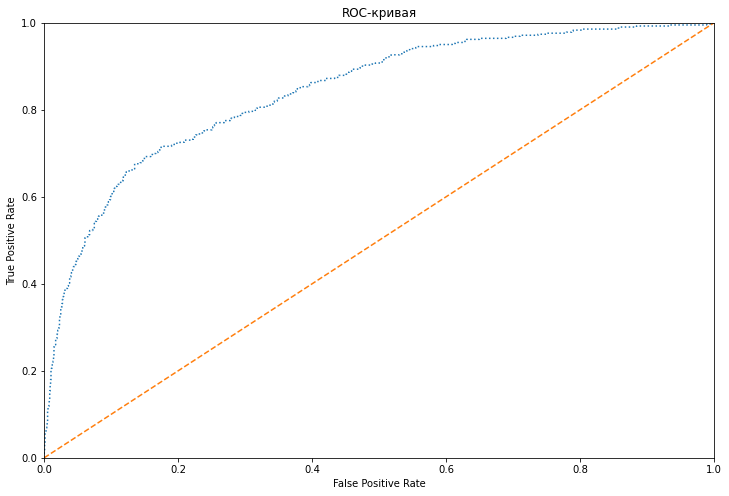

In [48]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linestyle=':')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

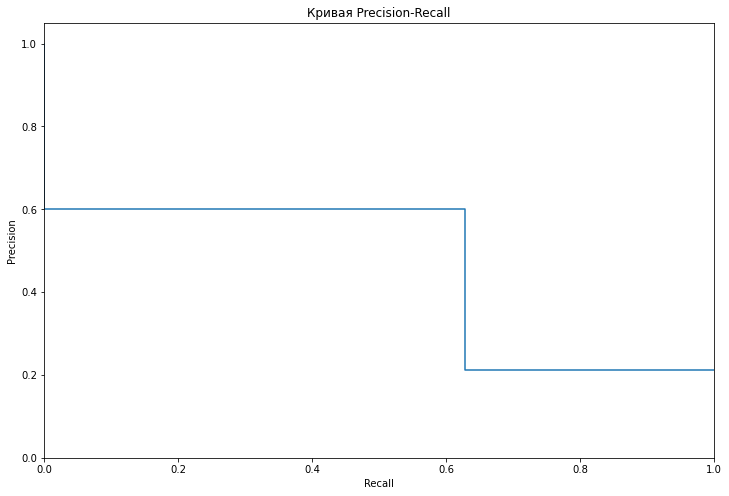

In [49]:
precision, recall, thresholds = precision_recall_curve(target_test, predicted_test)

plt.figure(figsize=(12, 8))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show()

### Вывод

Без подбора гиперпараметров результаты лучшей модели:
- на валидационной выборке:
 - f1_score = 0.61432, roc_auc - 0.83717
- на тестовой:
 - f1_score = 0.59530, roc_auc_score = 0.84740
 - время обучения - 948 ms,
 
Подбором гиперпараметров удалось улучшить результаты 
- на валидационной выборке:
 - f1_score = 0.63036, roc_auc_score = 0.84299
- на тестовой:
 - f1_score = 0.61503, roc_auc_score = 0.84194
 - время обучения: 170 ms

 [В начало раздела 4](#section_4)

<a id="section_5"></a>
## Общий вывод

Исследование проведено в интересах «Бета-Банка» и будет использовано для решения проблемы оттока клиентов. Цель - спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Критерий успешности - достижение метрикой F1 уровня не ниже 0.59. 

Для анализа нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

В ходе выполнения исследования нами были выполены загрузка данных, заполнение пропусков, удаление избыточных и переименование оставшихся столбцов, преобразование текстовых столбцов в числовые методом OHE, масштабирование количественных данных, выделение целевого признака и разбивка на обучающую, валидационную и тестовую выборки, размер выборок 6000, 2000 и 2000 объектов соответственно.

Качество и количество предоставленных данных позволяют провести исследование.

Мы протестировали модели с использованием алгоритмов LogisticRegression, DecisionTreeClassifier, RandomForestClassifier и DummyClassifier с гиперпараметрами по умолчанию.

Лучшие показатели оказались у модели, построеной по алгоритму RandomForestClassifier.
- accuracy_score: 0.8575
- recall_score: 0.45454545454545453
- precision_score: 0.7692307692307693
- f1_score: 0.5714285714285714

Проверка на вменяемость также пройдена:
accuracy_score: 0.8575 против 0.791 у случайной модели.

Однако, целевой уровнь метрики F1 не достигнут.

Выберем этот алгоритм для дальнейших экспериментов.

Еще на этапе подготовки данных был выявлен дисбаланс в распределении объектов по целевому признаку. Мы проверили, какое влияние на результаты модели оказывают различные способы борьбы с ним:
- установка гиперпараметров с учетом весов классов,
- метод upsampling,
- метод downsampling,
- подбор порогового значения.

Наилучшие результаты показало сочетание upsampling'а с подбором порогового значения.

Без подбора гиперпараметров результаты лучшей модели:
- на валидационной выборке:
 - f1_score = 0.61432, roc_auc - 0.83717
- на тестовой:
 - f1_score = 0.59530, roc_auc_score = 0.84740
 - время обучения - 948 ms,
 
Подбором гиперпараметров удалось улучшить результаты 
- на валидационной выборке:
 - f1_score = 0.63036, roc_auc_score = 0.84299
- на тестовой:
 - f1_score = 0.61503, roc_auc_score = 0.84194
 - время обучения: 170 ms

Можем констатировать, что нами построена модель со значением *F1*-меры, удовлетворяющем заданному уровню. При этом, достигнутый уровень *AUC-ROC* хоть и заметно меньше идеала (1), в то же время существенно выше, чем у случайной модели (0.5). Эти показатели достигнуты как на валидационной, так и на тестовой выборках. Заметим, что результаты на тестовой выборке ниже результатов на валидационной. Тем не менее полученные уровни превышают минимально приемлемый и позволяют использовать модель для решения поставленной задачи.

[В начало](#section_0)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*